In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

import ipywidgets as widgets

import smopy

%matplotlib inline

In [2]:
ls

DV_data.csv                README.md
DV_program_analysis.ipynb  plot.html


In [3]:
data = pd.read_csv('DV_data.csv')
data.sort_values('City', inplace=True)

In [4]:
data.head()

,City,Agency,Language,Website,fees listed on website,Address,Lat_Long,Registration_min,Registration_max,Other_costs,Class_min,Class_max,Veterans_only,Restrictions,Data_issue,Notes
0,Arcadia,4 Real Solutions Human Service Agency,English,no,NaN,"150 N Santa Anita Ave, Arcadia, CA 91006","34.141674, -118.031171",NaN,NaN,NaN,NaN,NaN,False,NaN,Left VM 8/11,NaN
1,Arcadia,4 Real Solutions Human Service Agency,Spanish,no,NaN,"150 N Santa Anita Ave, Arcadia, CA 91006","34.141674, -118.031171",NaN,NaN,NaN,NaN,NaN,False,NaN,Left VM 8/11,NaN
2,Arcadia,4 Real Solutions Human Service Agency,Chinese,no,NaN,"150 N Santa Anita Ave, Arcadia, CA 91006","34.141674, -118.031171",NaN,NaN,NaN,NaN,NaN,False,NaN,Left VM 8/11,NaN
3,Arcadia,Win-Win Relationship Learning Center,English,no,no,"66 W Duarte Rd, Arcadia, CA 91007","34.128777, -118.034497",40,40,0.0,18,20.0,False,NaN,NaN,NaN
4,Arcadia,Win-Win Relationship Learning Center,Chinese,no,no,"66 W Duarte Rd, Arcadia, CA 91007","34.128777, -118.034497",40,40,0.0,20,30.0,False,NaN,NaN,NaN


In [5]:
data['Lat'] = data['Lat_Long'].str.split(',').apply(lambda x: float(x[0]))
data['Long'] = data['Lat_Long'].str.split(',').apply(lambda x: float(x[1]))

In [6]:
data['Registration_min'] = np.where(data['Registration_min'].str.startswith("?"), np.nan, data['Registration_min'])
data['Registration_min'] = data['Registration_min'].astype(float)
data['Registration_max'] = np.where(data['Registration_max'].str.startswith("?"), np.nan, data['Registration_max'])
data['Registration_max'] = data['Registration_max'].astype(float)
# data['Other_costs'] = np.where(data['Other_costs'].str.startswith("?"), np.nan, data['Other_costs'])
data['Class_min'] = np.where(data['Class_min'].str.startswith("?"), np.nan, data['Class_min'])
data['Class_min'] = data['Class_min'].astype(float)
# data['Class_max'] = np.where(data['Class_max'].str.startswith("?"), np.nan, data['Class_max'])


In [7]:
no_nulls = data.dropna(subset=['Class_min'])

languages = no_nulls['Language'].unique().tolist()
print(languages)

['English', 'Chinese', 'Spanish', 'Armenian', 'Mandarin', 'Cantonese', 'Korean', 'Farsi', 'Portuguese', 'ASL', 'Russian']


In [8]:
num_sessions = 52

# Some classes will only do the min cost of $10 for three months, have Data_issue = '10-for-3'
data['min_total_cost'] = data['Registration_min'].astype(float) + data['Other_costs'] + \
    np.where(data['Data_issue'] == '10-for-3', 12*data['Class_min'] + (num_sessions - 12)*data['Class_max'], num_sessions*data['Class_min'])
data['regular_total_cost'] = data['Registration_max'] + data['Other_costs'] + num_sessions*data['Class_max']

## Plotting locations of programs

In [45]:
latMin = 33.6 # data['Lat'].min() ~33.75
latMax = 34.9 # data['Lat'].max() ~34.75
longMin = -118.9 # data['Long'].min() ~-118.8
longMax = -117.6 # data['Long'].max() ~-117.7

### Minimum cost of 52 week program per city, assuming client pays minimum cost per program

N.B. This does not include veterans programs.

In [9]:
def get_per_city_min(language):
    per_city_min = data[np.logical_and(data['Language'] == language, ~data['Veterans_only'])][
        ['City', 'min_total_cost']].dropna().groupby('City').min()
    print(per_city_min)

interact(get_per_city_min, language=languages)

A Jupyter Widget

<function __main__.get_per_city_min>

In [10]:
get_per_city_min("English")

                  min_total_cost
City                            
Arcadia                    976.0
Bell                      1085.0
Bellflower                1395.0
Beverly Hills             2496.0
Burbank                    335.0
Canoga Park                820.0
Carson                     820.0
Cerritos                  1100.0
Chatswoth                 1070.0
Compton                   1450.0
Covina                    1330.0
Culver City               1350.0
Diamond Bar                800.0
Downey                     310.0
East Los Angeles          1038.0
El Monte                   870.0
El Segundo                1300.0
Encino                    1080.0
Gardena                    335.0
Glendale                   545.0
Glendora                  1300.0
Hollywood                  550.0
Huntington Park            570.0
Inglewood                  880.0
La Mirada                  820.0
La Puente                 1130.0
Lakewood                  1410.0
Lancaster                  810.0
Lawndale  

In [11]:
get_per_city_min("Spanish")

                  min_total_cost
City                            
Bell                      1085.0
Burbank                    335.0
Canoga Park                820.0
Carson                    1090.0
Cerritos                  1620.0
Culver City               1350.0
East Los Angeles          1038.0
El Monte                   870.0
Encino                    1080.0
Gardena                     75.0
Glendora                  1300.0
Hollywood                  550.0
Huntington Park            780.0
Inglewood                 1585.0
La Puente                 1130.0
Lancaster                 1340.0
Lawndale                  1402.0
Long Beach                 570.0
Los Angeles                570.0
Mission Hills              830.0
Monrovia                  1330.0
Montebello                1090.0
North Hollywood           1325.0
Norwalk                   1340.0
Pacoima                    260.0
Palmdale                  1340.0
Panorama City              780.0
Pasadena                   810.0
Pico River

### Minimum cost of 52 week program per city, assuming client pays full cost for program.

N.B. This does not include veterans programs.

In [12]:
def get_per_city_reg(language):
    per_city_reg = data[np.logical_and(data['Language'] == language, ~data['Veterans_only'])][
        ['City', 'regular_total_cost']].dropna().groupby('City').min()
    print(per_city_reg)

interact(get_per_city_reg, language=languages)

A Jupyter Widget

<function __main__.get_per_city_reg>

In [13]:
get_per_city_reg("English")

                  regular_total_cost
City                                
Arcadia                       1080.0
Bell                          1345.0
Bellflower                    2695.0
Beverly Hills                 2600.0
Burbank                       2155.0
Canoga Park                   1060.0
Carson                        1350.0
Cerritos                      1620.0
Chatswoth                     1590.0
Compton                       1450.0
Covina                        2130.0
Culver City                   1350.0
Diamond Bar                   1060.0
Downey                        3430.0
East Los Angeles              1375.0
El Monte                      1300.0
El Segundo                    2600.0
Encino                        1600.0
Gardena                       1375.0
Glendale                      1325.0
Glendora                      1300.0
Hollywood                     1330.0
Huntington Park               1070.0
Inglewood                     1400.0
La Mirada                     1340.0
L

In [14]:
get_per_city_reg("Spanish")

                  regular_total_cost
City                                
Bell                          1345.0
Burbank                       2155.0
Canoga Park                   1340.0
Carson                        1350.0
Cerritos                      1620.0
Culver City                   1350.0
East Los Angeles              1375.0
El Monte                      1090.0
Encino                        1600.0
Gardena                       1375.0
Glendora                      1300.0
Hollywood                     1330.0
Huntington Park               1070.0
Inglewood                     7825.0
La Puente                     1650.0
Lancaster                     1340.0
Lawndale                      2702.0
Long Beach                    1350.0
Los Angeles                   1350.0
Mission Hills                 1350.0
Monrovia                      5230.0
Montebello                    1605.0
North Hollywood               1325.0
Norwalk                       2900.0
Pacoima                       1040.0
P

### Average cost of a 52 week program per city.

N.B. This does not include veterans programs.

In [15]:
def get_per_city_avg(language):
    per_city_average = data[np.logical_and(data['Language'] == language, ~data['Veterans_only'])][
        ['City', 'regular_total_cost']].dropna().groupby('City').mean().round(2)
    print(per_city_average)

interact(get_per_city_avg, language=languages)

A Jupyter Widget

<function __main__.get_per_city_avg>

In [16]:
get_per_city_avg("English")

                  regular_total_cost
City                                
Arcadia                      1080.00
Bell                         1345.00
Bellflower                   2695.00
Beverly Hills                2600.00
Burbank                      2155.00
Canoga Park                  1200.00
Carson                       1371.00
Cerritos                     1620.00
Chatswoth                    1590.00
Compton                      1450.00
Covina                       3680.00
Culver City                  1417.00
Diamond Bar                  1060.00
Downey                       3430.00
East Los Angeles             1674.50
El Monte                     1797.50
El Segundo                   2600.00
Encino                       1600.00
Gardena                      2030.00
Glendale                     1585.00
Glendora                     1300.00
Hollywood                    1330.00
Huntington Park              1240.00
Inglewood                    4391.67
La Mirada                    1340.00
L

In [17]:
get_per_city_avg("Spanish")

                  regular_total_cost
City                                
Bell                         1345.00
Burbank                      2155.00
Canoga Park                  1359.50
Carson                       1350.00
Cerritos                     1620.00
Culver City                  1417.00
East Los Angeles             1611.00
El Monte                     1370.00
Encino                       1600.00
Gardena                      2030.00
Glendora                     1300.00
Hollywood                    1330.00
Huntington Park              1240.00
Inglewood                    7825.00
La Puente                    1650.00
Lancaster                    1340.00
Lawndale                     2702.00
Long Beach                   1719.00
Los Angeles                  2081.50
Mission Hills                1350.00
Monrovia                     5230.00
Montebello                   2471.67
North Hollywood              1325.00
Norwalk                      2900.00
Pacoima                      1182.50
P

## Veterans' programs

All veterans programs are free, but for veterans only. There are only 3 veterans programs in the LA area.

In [36]:
vets = data[data['Veterans_only']][['City', 'Agency', 'Address', 'Lat', 'Long']]
vets[['City', 'Agency', 'Address']]

,City,Agency,Address
48,East Los Angeles,East LA Vet Center,"5400 E Olympic Blvd, Commerce, CA 90022"
64,Gardena,Dept of Veterans Affairs,"1045 W Redondo Beach Blvd, Gardena, CA 90247"
212,Sherman Oaks,Dept of Veteran Affairs,"16111 Plummer St, North Hills, CA 91343"


Text(0.5,1,u"Veterans' programs")

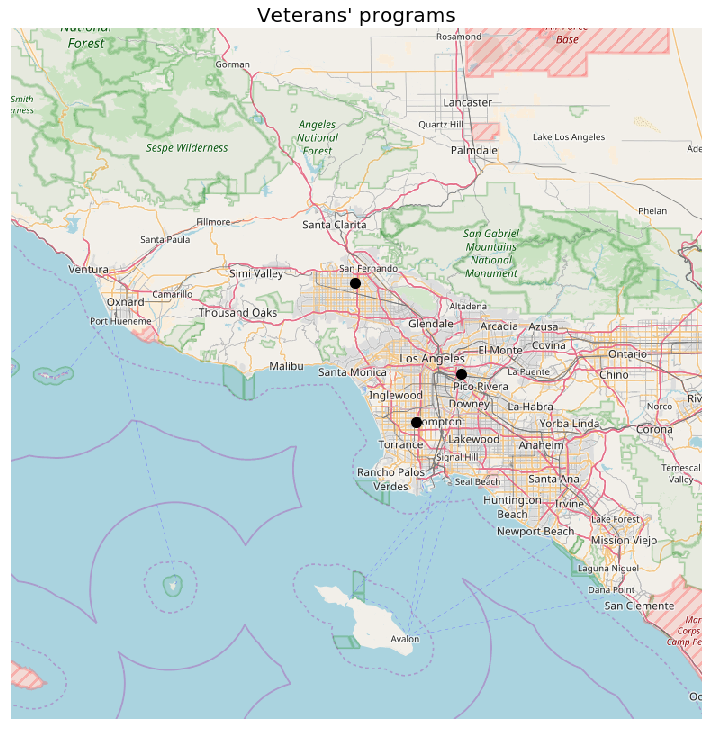

In [37]:
smap = smopy.Map((33.5, -119., 34.5, -118.), z=9)
x, y = smap.to_pixels(vets['Lat'], vets['Long'])
ax = smap.show_mpl(figsize=(10, 10))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Veterans' programs", fontsize=20)

## Program count

Counting the number of programs per city